# How to Normalize Data in Python

## Learning Objectives
Part of the objective of data preparation, is to transform our data in order to make it more suitable for machine learning. During this step, we often have to restructure some of our data so that it conforms to a particular characteristic. This is known as **normalization** or **standardization**. There are several ways to normalize data in Python. By the end of the tutorial, you will have learned:

+ how to perform min-max normalization
+ how to perform z-score normalization

In [1]:
import pandas as pd
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


In [3]:
# vehicles[['co2emissions']].describe()
# So let's get descriptive statistics for that column, vehicles specify the column that we want, 
# which is CO2 emissions. And we call it that describe method to augment our understanding of the 
# summary statistics
vehicles[['co2emissions']].describe()

,co2emissions
count,36979.000000
mean,476.550703
std,117.791357
min,29.000000
25%,400.000000
50%,467.736842
75%,555.437500
max,1269.571429


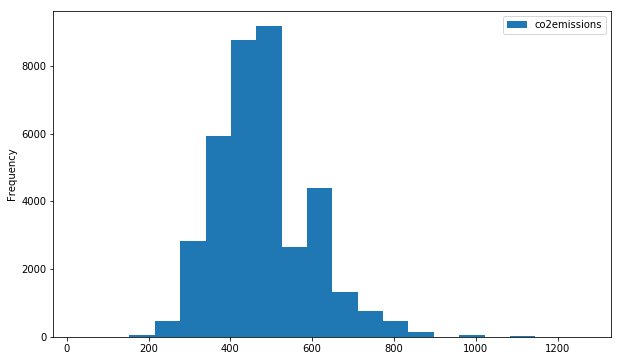

In [4]:
#  Let's also create a histogram that shows the distribution of values for the CO2 emissions column, 
# the histogram visualizes, what we already see in the summary statistics, the carbon emissions values in the 
# dataset have minimum, and maximum values of 29 and 1269.57 respectively. They also have mean and median values 
# of 476.55 and 467.74 Respectively.

%matplotlib inline
vehicles[['co2emissions']].plot(kind = 'hist', 
                                bins = 20, 
                                figsize = (10, 6))

## How to perform min-max Normalization

In [6]:
# This scikit-learn package provides several functions for transforming data in Python for min-max normalization.
# We first import the min-max scaler object from, the SK learn pre-processing sub package, to from SK learn, 
# dot pre-processing, we import the min max scaler object. 

from sklearn.preprocessing import MinMaxScaler

In [7]:
# Next, we use the fit transform method of, the object to normalize our data. 

co2emissions_mm = MinMaxScaler().fit_transform(vehicles[['co2emissions']])
co2emissions_mm

# So we're going to call on new data CO2 emissions on the score MM. 
# And it's going to be the min-max scaler object, the fit on the squad transform method within the method. 
# We passed away, the data we want to transform, which is vehicles, and we want the CO2 emissions column. 
# And then we output our results. 
 




array([[0.42435082],
       [0.42435082],
       [0.36738062],
       ...,
       [0.38208199],
       [0.50944265],
       [0.41674344]])

In [8]:
# Notice that our result is a nonPareil. 
# We can convert it back to a data frame 
# by using the pandas, data frame, construct a function. 
# So let us right back CO2 emissions, the MM and a call the PD that data frame, construct a function. 
# Then the function we're going to pass to it. Two things, our original data, CO2 emissions, M M, 
# and the value for the columns arguments, which this time around will be just a list of the column name that 
# we want, which is CO2 emissions. 

# And we output our data. Once more. 
# Now we can get summary statistics for our normalized data frame, so to do so we call the data frame 
# CO2 emissions, on the score, MM. 

co2emissions_mm = pd.DataFrame(co2emissions_mm, columns = ['co2emissions'])
co2emissions_mm

,co2emissions
0,0.424351
1,0.424351
2,0.367381
3,0.318536
4,0.424351
...,...
36974,0.332911
36975,0.352257
36976,0.382082
36977,0.509443


In [9]:
# And we call the describe method of the data frame.
co2emissions_mm.describe()

,co2emissions
count,36979.000000
mean,0.360762
std,0.094949
min,0.000000
25%,0.299056
50%,0.353657
75%,0.424351
max,1.000000


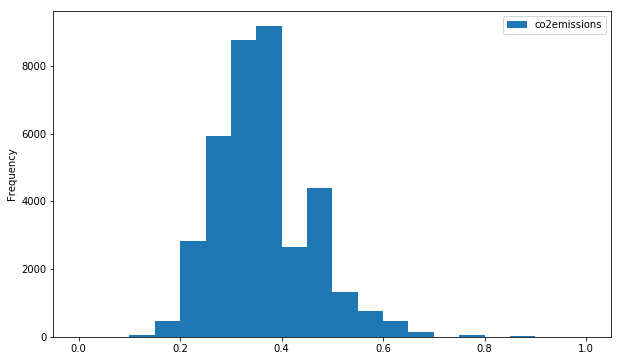

In [10]:
# We can also visualize it, 
# which is what we have here based on the summary statistics and the visualization. 
# We see that the minimum value is now zero, while the maximum value is one. 
# That is what we expect for min-max normalization. 

co2emissions_mm.plot(kind = 'hist', 
                     bins = 20, 
                     figsize = (10, 6))

# However, notice that compared to the original data, 
# even though the scale of the X axis changed, the basic structure or shape of the histogram, remains the same,
# that is also expected. 

## How to perform z-score Normalization

In [11]:
# For z-score normalization, We import the standard scaler object from the SK learn 
# pre-processing sub package. So from SK learn that pre processing, we import standard scaler. 

from sklearn.preprocessing import StandardScaler

In [12]:
# Next, we normalize our data, convert it to a data frame and compute summary statistics like we did. 
# in the previous example.

co2emissions_zm = StandardScaler().fit_transform(vehicles[['co2emissions']])
co2emissions_zm = pd.DataFrame(co2emissions_zm, columns = ['co2emissions'])
co2emissions_zm.describe()

,co2emissions
count,3.697900e+04
mean,-1.598668e-16
std,1.000014e+00
min,-3.799572e+00
25%,-6.498927e-01
50%,-7.482706e-02
75%,6.697254e-01
max,6.732510e+00


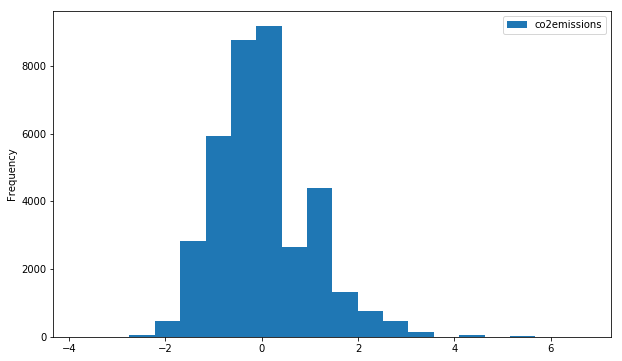

In [13]:
# finally, we visualize the data as well. As expected, the basic structure of the 
# histogram remained intact. Even with the change to the scale of the X axis. This time, we also notice that our
# minimum and maximum values, are negative 3.8 and 6.7 respectively. Also note that the standard deviation is one,
# and the mean is effectively zero.
co2emissions_zm.plot(kind = 'hist', 
                     bins = 20, 
                     figsize = (10, 6))